In [30]:
import geopandas as gpd
import pandas as pd
from pathlib import Path
import re
import numpy as np
import rasterio.mask
from geoutils import add_feature



In [33]:
ifn_biomass_fnames = Path('ifn4_biomass_plottype/').glob('*.shp')

height_biomass_df = pd.DataFrame()
for fname in ifn_biomass_fnames:

    ifn4 = gpd.read_file(fname)

    for p in range(80,100,5):
        ifn4['Hp{}'.format(p)]=np.nan
    ifn4['Hmean']=np.nan
    ifn4['Hmax']=np.nan

    for ix, row in ifn4.iterrows():
        circle = [row.geometry.buffer(25)]

        mission = row.mission
        pnoa_dir = 'PNOA{}_LIDAR_vegetation/'.format(mission)
        pnoa_path = '{}{}'.format(pnoa_dir,row.pnoa_file)
        with rasterio.open(pnoa_path) as pnoa_src:
            
            pnoa_image, pnoa_trf = rasterio.mask.mask(pnoa_src, circle, crop=True)
            pnoa_image= np.where(pnoa_image==pnoa_src.nodata, np.nan, pnoa_image) 

            for p in range(80,100,5):
                ifn4.at[ix,'Hp{}'.format(p)] = np.nanpercentile(pnoa_image,q=p)
            ifn4.at[ix,'Hmean']=np.nanmean(pnoa_image)
            ifn4.at[ix,'Hmax']=np.nanmax(pnoa_image)  

    ifn4=ifn4.dropna()      

    ifn4 = add_feature(ifn4.to_crs("EPSG:4326"),"BIOME_NAME","ecoregions/Ecoregions2017.shp","Biome")
    ifn4 = add_feature(ifn4.to_crs("EPSG:4326"),"ECO_NAME","ecoregions/Ecoregions2017.shp","Ecoregion")

    columns = ['Hp{}'.format(p) for p in range(80,100,5)]
    columns.append('Hmean')
    columns.append('Hmax')
    columns.append('AGB')
    columns.append('Type')
    columns.append('Biome')
    columns.append('Plot Type')
    columns.append('Estadillo')
    columns.append('Provincia')

    tmp = ifn4[columns]   
    height_biomass_df = pd.concat([height_biomass_df,tmp],axis='rows')

height_biomass_df.to_csv('H_AGB_NFI4_PNOA_Biome_Ecoregion_PlotType.csv',index=False)
height_biomass_df

/home/dibepa/.conda/envs/iberian.carbon/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/tmp/ipykernel_33660/889331938.py:26: RuntimeWarning: Mean of empty slice
  ifn4.at[ix,'Hmean']=np.nanmean(pnoa_image)
/tmp/ipykernel_33660/889331938.py:27: RuntimeWarning: All-NaN slice encountered
  ifn4.at[ix,'Hmax']=np.nanmax(pnoa_image)
/home/dibepa/.conda/envs/iberian.carbon/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/tmp/ipykernel_33660/889331938.py:26: RuntimeWarning: Mean of empty slice
  ifn4.at[ix,'Hmean']=np.nanmean(pnoa_image)
/tmp/ipykernel_33660/889331938.py:27: RuntimeWarning: All-NaN slice encountered
  ifn4.at[ix,'Hmax']=np.nanmax(pnoa_image)
/home/dibepa/.conda/envs/iberian.carbon/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1424: RuntimeWarning: All-NaN slice encountered
  r

,Hp10,Hp20,Hp30,Hp40,Hp50,Hp60,Hp70,Hp80,Hp90,Hmean,Hmax,AGB,Type,Biome
0,0.2024,0.2798,0.3294,0.4060,0.4640,0.5898,0.6796,0.961000,3.893597,1.588296,26.488001,163.089100,Angiosperm,Temperate Broadleaf & Mixed Forests
1,0.2068,0.3058,0.4010,0.5728,0.9900,1.2832,1.6064,2.509200,4.398799,2.152200,25.875000,335.119813,Angiosperm,Temperate Broadleaf & Mixed Forests
2,0.8944,1.1344,1.3057,1.6420,2.2065,2.5274,3.1868,3.825201,5.862700,2.912842,16.062000,38.355871,Angiosperm,Temperate Broadleaf & Mixed Forests
3,0.2956,0.3308,0.3788,0.4046,0.4300,0.4980,0.5933,0.717000,1.770897,0.994900,16.032000,1.506333,Angiosperm,Temperate Broadleaf & Mixed Forests
4,0.2990,0.4006,0.5931,0.9102,1.4250,2.1078,3.3666,5.381003,12.148597,3.871689,24.273001,207.916605,Angiosperm,Temperate Broadleaf & Mixed Forests
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,4.7950,5.8750,6.4750,6.9000,7.2500,7.7500,8.1100,8.570000,9.200000,7.171417,11.300000,74.692717,Gymnosperm,Temperate Broadleaf & Mixed Forests
930,0.4750,0.7500,1.3275,2.0000,2.7875,3.4750,4.0750,4.575000,5.232500,2.792537,7.300000,112.821704,Gymnosperm,Temperate Broadleaf & Mixed Forests
931,0.4575,0.7400,1.0250,1.3250,1.5375,1.8000,1.9750,2.310000,2.642500,1.625187,6.000000,98.971825,Gymnosperm,"Mediterranean Forests, Woodlands & Scrub"
932,1.5200,2.5850,3.5100,4.2600,5.0500,5.6000,6.1800,7.395000,9.664999,5.237739,13.525000,77.456618,Gymnosperm,"Mediterranean Forests, Woodlands & Scrub"


In [1]:
import pandas as pd
height_biomass_df = pd.read_csv('H_AGB_NFI4_PNOA_Biome_Ecoregion_PlotType.csv')

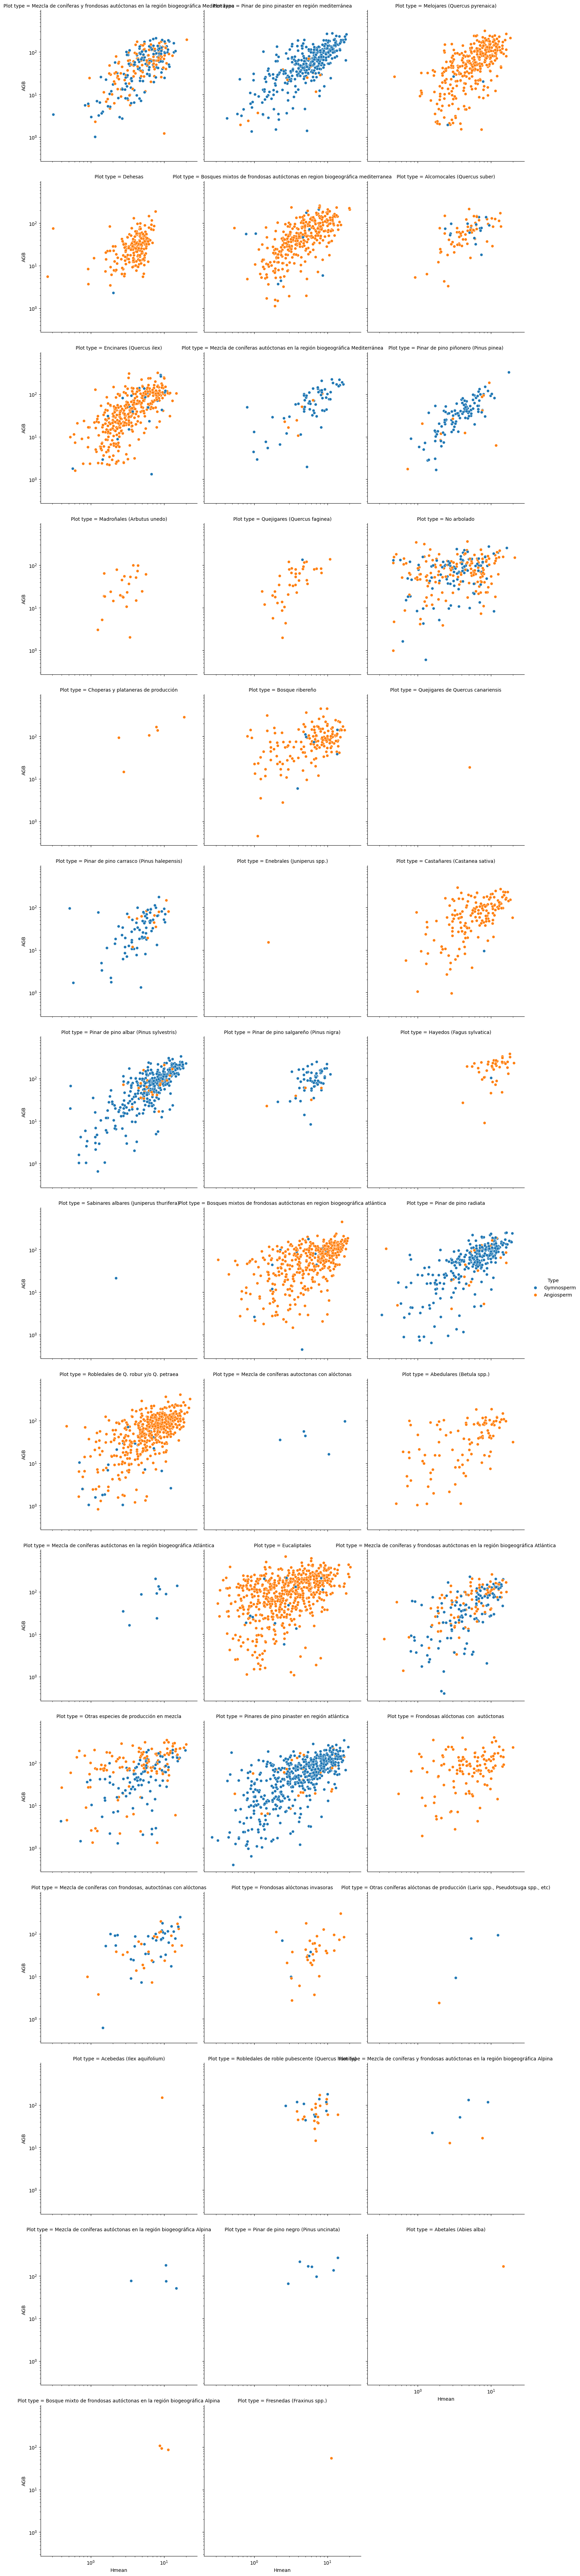

In [4]:
import seaborn as sns

df = height_biomass_df[(height_biomass_df['Hmean']<100) & (height_biomass_df['Hmax']>1.3) ]

df_angiosperms = df[df.Type == 'Angiosperm']
df_gymnosperms = df[df.Type == 'Gymnosperm']

# g=sns.relplot(data=df_angiosperms,x='Hmax',y='AGB',kind='scatter',hue="Biome")
# g.set(xscale='log')
# g.set(yscale='log')

# g=sns.relplot(data=df_gymnosperms,x='Hmax',y='AGB',kind='scatter',hue="Biome")
# g.set(xscale='log')
# g.set(yscale='log')

g=sns.relplot(data=df,x='Hmean',y='AGB',kind='scatter',col='Plot type',hue='Type',col_wrap=3)
g.set(xscale='log')
g.set(yscale='log')

# g = sns.regplot(x=np.log(df['max']),y=np.log(df['AGB']),robust=True)
# g.set(xscale='log')
# g.set(yscale='log')

In [5]:
from scipy import stats
import numpy as np

allometries = pd.DataFrame()
group_low_samples = pd.DataFrame()
for forest_type in df['Plot type'].unique():

    dftype = df[df['Plot type']==forest_type]

    if len(dftype.index)<=10:
        group_low_samples = pd.concat([group_low_samples,dftype])
    else:
        regression = stats.linregress(np.log(dftype['Hmean']), np.log(dftype['AGB']))

        row = pd.DataFrame({'Plot type':forest_type,'intercept':[regression.intercept],'slope':[regression.slope],'r':[regression.rvalue],'samples':[len(dftype.index)]})
        allometries = pd.concat([allometries,row],axis='rows')
allometries

# result_angio = stats.linregress(np.log(df_angiosperms['Hmean']), np.log(df_angiosperms['AGB']))
# print(result_angio.intercept, result_angio.intercept_stderr)
# result_gymno = stats.linregress(np.log(df_gymnosperms['Hmean']), np.log(df_gymnosperms['AGB']))
# print(result_gymno.intercept, result_gymno.intercept_stderr)

# print(result_angio)
# print(result_gymno)

,Plot type,intercept,slope,r,samples
0,Mezcla de coníferas y frondosas autóctonas en ...,1.936896,1.164712,0.690829,271
0,Pinar de pino pinaster en región mediterránea,2.171064,1.050120,0.739614,359
0,Melojares (Quercus pyrenaica),1.897922,1.138235,0.610678,358
0,Dehesas,2.294450,0.718050,0.431677,214
0,Bosques mixtos de frondosas autóctonas en regi...,2.263473,0.993711,0.629588,353
0,Alcornocales (Quercus suber),2.535481,0.930150,0.606187,79
0,Encinares (Quercus ilex),2.124672,1.167754,0.673493,387
0,Mezcla de coníferas autóctonas en la región bi...,1.972219,1.144800,0.737052,72
0,Pinar de pino piñonero (Pinus pinea),1.817970,1.219040,0.760653,119
0,Madroñales (Arbutus unedo),2.196851,1.013569,0.419177,25


In [12]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

def power_law(x,intercept,slope):
    return np.exp(intercept)*np.power(x,slope)

# allometries.set_index('Plot type',inplace=True)

error_df = pd.DataFrame()

for index, row in allometries.iterrows():
    intercept = row.intercept
    slope = row.slope

    h_array = df[df['Plot type'] == index]['Hmean']
    true_agbd = df[df['Plot type'] == index]['AGB']
    fitted_agbd = power_law(h_array,intercept,slope)

    R2 = r2_score(true_agbd,fitted_agbd)
    mae = mean_absolute_error(true_agbd,fitted_agbd)
    rmse = root_mean_squared_error(true_agbd,fitted_agbd)
    mape = mean_absolute_percentage_error(true_agbd,fitted_agbd)*100


    new_row = pd.DataFrame({'Plot type':[index],'R2':[R2],'MAE':[mae],'RMSE':[rmse],'MAPE':[mape]})
    error_df = pd.concat([error_df,new_row],axis='rows')

error_df.set_index('Plot type')    


,R2,MAE,RMSE,MAPE
Plot type,,,,
Mezcla de coníferas y frondosas autóctonas en la región biogeográfica Mediterránea,0.286633,29.717081,40.946455,102.885331
Pinar de pino pinaster en región mediterránea,0.472224,26.304807,39.016804,72.682068
Melojares (Quercus pyrenaica),0.262735,35.042886,50.172004,116.594120
Dehesas,0.085616,15.659951,24.596079,61.958149
Bosques mixtos de frondosas autóctonas en region biogeográfica mediterranea,0.308140,29.100455,43.517560,92.047189
Alcornocales (Quercus suber),0.188133,26.511972,38.600619,64.311562
Encinares (Quercus ilex),0.309005,28.291127,45.164287,103.110930
Mezcla de coníferas autóctonas en la región biogeográfica Mediterránea,0.568303,27.233637,37.012024,85.078371
Pinar de pino piñonero (Pinus pinea),0.587172,17.136201,26.868677,66.537925


Verify robustness


In [25]:
def power_law(x,a,b):
    return a*np.power(x,b)

def exponential(x,a,b):
    return np.exp(a+x*b)    

from scipy.optimize import curve_fit

error_df = pd.DataFrame()

for function in [power_law,exponential]:
    if function == power_law:
        func_name = 'Power-law'
    else:
        func_name = 'Exponential'    
    for plot_type in df['Plot type'].unique():

        df_plot = df[df['Plot type']==plot_type]

        true_agbd = df_plot['AGB']
        hmean = df_plot['Hmean']

        try:
            fit = curve_fit(function,hmean,true_agbd,method='lm')
            a = fit[0][0]
            b = fit[0][1]

            fitted_agbd = function(hmean,a,b)
            R2 = r2_score(true_agbd,fitted_agbd)
            mae = mean_absolute_error(true_agbd,fitted_agbd)
            rmse = root_mean_squared_error(true_agbd,fitted_agbd)
            mape = mean_absolute_percentage_error(true_agbd,fitted_agbd)*100


            new_row = pd.DataFrame({'Plot type':[plot_type],'function':func_name,'R2':[R2],'MAE':[mae],'RMSE':[rmse],'MAPE':[mape]})
            error_df = pd.concat([error_df,new_row],axis='rows')
        except:
            continue

error_df.pivot_table(index='Plot type',columns='function',values=['R2','MAE','RMSE','MAPE'])    


MAE             \
function                                           Exponential  Power-law   
Plot type                                                                   
Abedulares (Betula spp.)                             31.569343  29.554794   
Alcornocales (Quercus suber)                         27.803040  26.855856   
Bosque mixto de frondosas autóctonas en la regi...    3.990940   3.857476   
Bosque ribereño                                      56.623319  56.349716   
Bosques mixtos de frondosas autóctonas en regio...   31.910209  31.545397   
Bosques mixtos de frondosas autóctonas en regio...   32.384149  30.114323   
Castañares (Castanea sativa)                         43.603726  42.282608   
Choperas y plataneras de producción                  24.384282  21.788931   
Dehesas                                              15.600654  15.879281   
Encinares (Quercus ilex)                             32.723943  29.183750   
Eucaliptales                                         74.356074  72.382318   
Frondosas alóctonas con  autóctonas                  56.720710  57.656549   
Frondosas alóctonas invasoras                        32.721990  32.792689   
Hayedos (Fagus sylvatica)                            62.532921  62.028685   
Madroñales (Arbutus unedo)                           21.322826  20.578726   
Melojares (Quercus pyrenaica)                        37.116985  35.232716   
Mezcla de coníferas autoctonas con alóctonas         15.685314  17.545811   
Mezcla de coníferas autóctonas en la región bio...   41.751538  41.129582   
Mezcla de coníferas autóctonas en la región bio...   36.452518  33.793995   
Mezcla de coníferas autóctonas en la región bio...   29.610479  26.354799   
Mezcla de coníferas con frondosas, autoctónas c...   34.154206  34.017987   
Mezcla de coníferas y frondosas autóctonas en l...   34.265185  32.436248   
Mezcla de coníferas y frondosas autóctonas en l...   32.599104  31.211389   
Mezcla de coníferas y frondosas autóctonas en l...   32.884123  30.047877   
No arbolado                                          46.239100  46.496410   
Otras coníferas alóctonas de producción (Larix ...   21.341483  18.403835   
Otras especies de producción en mezcla               50.142789  50.818845   
Pinar de pino albar (Pinus sylvestris)               32.394518  30.127847   
Pinar de pino carrasco (Pinus halepensis)            22.094235  21.236509   
Pinar de pino negro (Pinus uncinata)                 51.117867  50.528190   
Pinar de pino pinaster en región mediterránea        28.886605  26.952550   
Pinar de pino piñonero (Pinus pinea)                 18.184526  16.823370   
Pinar de pino radiata                                30.465889  27.949130   
Pinar de pino salgareño (Pinus nigra)                38.951767  38.369037   
Pinares de pino pinaster en región atlántica         33.723065  31.330882   
Quejigares (Quercus faginea)                         25.500392  23.622833   
Robledales de Q. robur y/o Q. petraea                35.243188  33.963429   
Robledales de roble pubescente (Quercus humilis)     33.454082  33.621163   

                                                          MAPE              \
function                                           Exponential   Power-law   
Plot type                                                                    
Abedulares (Betula spp.)                            326.044144  253.310601   
Alcornocales (Quercus suber)                        104.430355   89.590505   
Bosque mixto de frondosas autóctonas en la regi...    4.120225    3.993282   
Bosque ribereño                                     215.605393  189.483177   
Bosques mixtos de frondosas autóctonas en regio...  191.913876  178.065018   
Bosques mixtos de frondosas autóctonas en regio...  167.035935  133.445850   
Castañares (Castanea sativa)                        231.786327  189.636735   
Choperas y plataneras de producción                  86.574309   65.123665   
Dehesas                                    

In [22]:
error_df.set_index('Plot type').median()

R2        0.288776
MAE      32.722966
RMSE     42.822514
MAPE    167.452725
dtype: float64

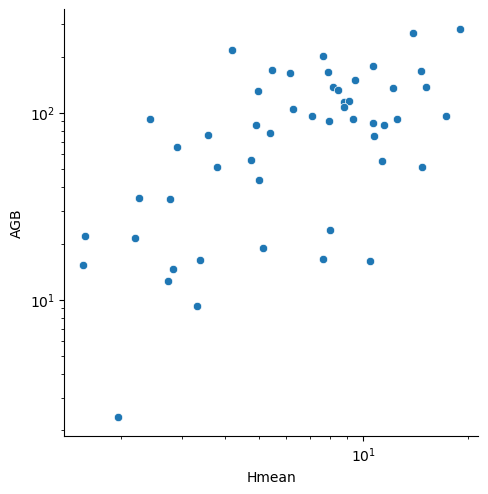

In [17]:


regression = stats.linregress(np.log(group_low_samples['Hmean']), np.log(group_low_samples['AGB']))
regression

g=sns.relplot(group_low_samples,x='Hmean',y='AGB')
g.set(xscale='log',yscale='log')

In [18]:
regression = stats.linregress(np.log(df['Hmean']), np.log(df['AGB']))
regression

LinregressResult(slope=0.7579605325313735, intercept=2.738202639687869, rvalue=0.5210303435261363, pvalue=0.0, stderr=0.015044203376132863, intercept_stderr=0.025652738042272496)

LinregressResult(slope=np.float64(1.0198458554348162), intercept=np.float64(2.328138959182686), rvalue=np.float64(0.6537616506389339), pvalue=np.float64(3.450679287242692e-284), stderr=np.float64(0.024465136802226166), intercept_stderr=np.float64(0.040629843249402185))
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[np.float64(0.0), np.float64(10.25883165198237), np.float64(20.801856519784298), np.float64(31.454880329322275), np.float64(42.17997227648007), np.float64(52.95897428751199), np.float64(63.781133140157316), np.float64(74.63931355446765), np.float64(85.52842673212879), np.float64(96.44465667206816), np.float64(107.3850338845256), np.float64(118.34718081264786), np.float64(129.32915026385422), np.float64(140.32931786131473), np.float64(151.34630764656356), np.float64(162.3789389560214), np.float64(173.42618746461568), np.float64(184.48715596307542), np.float64(195.5610520038649), np.float64(206.64717050734515), np.float64(217.7448800230995), np.f

TypeError: 'Axes' object is not callable

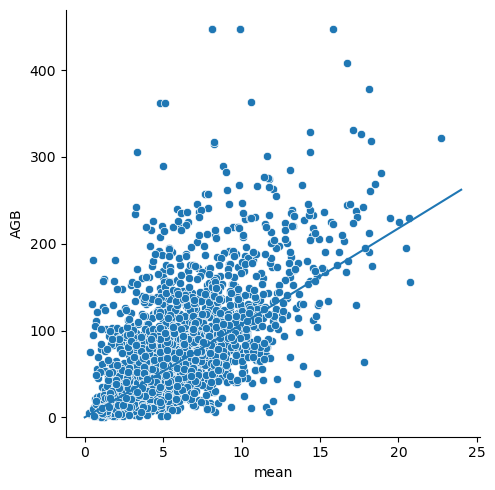

In [6]:
result = stats.linregress(np.log(df['mean']), np.log(df['AGB']))
print(result)

a = result.intercept
b = result.slope

def fitted_func(h):
    agb = np.exp(a)*np.pow(h,b)
    return agb

vec = np.arange(0,25,1)
print(vec)
res = [fitted_func(h) for h in vec ]
print(res)

df2 = pd.DataFrame.from_dict({"H":vec,"AGB":res})
print(df2)

g=sns.relplot(data=df,x='mean',y='AGB',kind='scatter')
g.map(sns.lineplot(data=df2,x="H",y="AGB"))

In [37]:
def power_law(x,a,b):
    return a*np.power(x,b)

def exponential(x,a,b):
    return np.exp(a+x*b)    

from scipy.optimize import curve_fit

results = curve_fit(exponential,df['Hmax'],df['AGB'],method='trf',**{'loss':'huber'})
print(results[0])

a=results[0][0]
b=results[0][1]

print(b)

vec = np.arange(0,22,1)
res = [exponential(h,a,b) for h in vec ]

df2 = pd.DataFrame.from_dict({"H":vec,"AGB":res})

g=sns.relplot(data=df,x='Hmean',y='AGB',kind='scatter',hue="Biome",alpha=0.7)
g.map(sns.lineplot(data=df2,x="H",y="AGB",color='r'))



RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error
# Estimation
hmean = df['Hmax']
estimation = [exponential(h,a,b) for h in hmean ]

r2 = r2_score(df.AGB,estimation)
mae = mean_absolute_error(df.AGB,estimation)

print(r2,mae)

-5.647546313355547e+42 2.3147126698210744e+21


In [41]:
results = curve_fit(power_law,df['Hmax'],df['AGB'],method='trf',**{'loss':'huber'})
print(results[0])
a=results[0][0]
b=results[0][1]

estimation = [power_law(h,a,b) for h in hmean ]

r2 = r2_score(df.AGB,estimation)
mae = mean_absolute_error(df.AGB,estimation)

print(r2,mae)

[3.71940396 1.06286678]
0.24107292405659486 40.25539195936094
